In [1]:
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
import sklearn.cross_validation as cross_validation
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import sklearn.tree as tree
import graphviz 
import pydotplus

from sklearn import model_selection
from sklearn.metrics import accuracy_score

C:\Users\zafri\Anaconda2\envs\py36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#FOR MODEL SELECTION
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV


In [3]:
import os
import pandas as pd
import numpy as np
import math 
import statsmodels as sm
import winsound

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Locate Data

In [4]:
cwd=os.getcwd()
print (cwd)


C:\Users\zafri\Documents\COGS 118A\final


In [5]:
def data_locate(rel_path_to_input,a):
    cwd = os.getcwd()
    stem=cwd
    for i in range(a):
        stem=os.path.abspath(os.path.join(stem, '..'))
    data_loc=os.path.join(stem , rel_path_to_input)
    os.chdir(data_loc)
    sub_files = os.listdir(data_loc)
    print ("Current Directory: ", cwd)
    print ("Data location: " , data_loc)
    print (sub_files)
    return data_loc, sub_files

In [6]:
data_loc, sub_files=data_locate("Datasets/Adult", 0)

Current Directory:  C:\Users\zafri\Documents\COGS 118A\final
Data location:  C:\Users\zafri\Documents\COGS 118A\final\Datasets/Adult
['adult.data.txt', 'adult.names.txt', 'adult.test.txt', 'EEG Eye State.txt', 'EEG_OG_Data', 'EEG_OG_Data_results.csv', 'EEG_OG_Data___20', 'EEG_OG_Data___20.pdf', 'EEG_OG_Data___50', 'EEG_OG_Data___50.pdf', 'EEG_OG_Data___80', 'EEG_OG_Data___80.pdf', 'EEG_TRIAL.csv']


# EEG Eye State Data Set 

#### 1. Peek at Data

In [7]:
EEG_OG_Data = pd.read_csv(
    'EEG Eye State.txt',
    names=[
        'AF3','F7','F3','FC5','T7','P','O1','O2','P8','T8','FC6','F4','F8','AF4','class'],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")
DATASET="EEG_OG_Data"

In [8]:

EEG_OG_Data.head()

,AF3,F7,F3,FC5,T7,P,O1,O2,P8,T8,FC6,F4,F8,AF4,class
0,@RELATION EEG_DATA,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,@ATTRIBUTE AF3 NUMERIC,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,@ATTRIBUTE F7 NUMERIC,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,@ATTRIBUTE F3 NUMERIC,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,@ATTRIBUTE FC5 NUMERIC,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Let's Clean up the data

In [9]:
#remove class label information from top of data
EEG_OG_Data=EEG_OG_Data.drop(range(0,17), axis=0)


In [10]:
EEG_OG_Data.head()

,AF3,F7,F3,FC5,T7,P,O1,O2,P8,T8,FC6,F4,F8,AF4,class
17,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0.0
18,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0.0
19,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0.0
20,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0.0
21,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0.0


In [61]:
print (EEG_OG_Data.shape)

(14980, 15)


#### Let's Peek at the Features

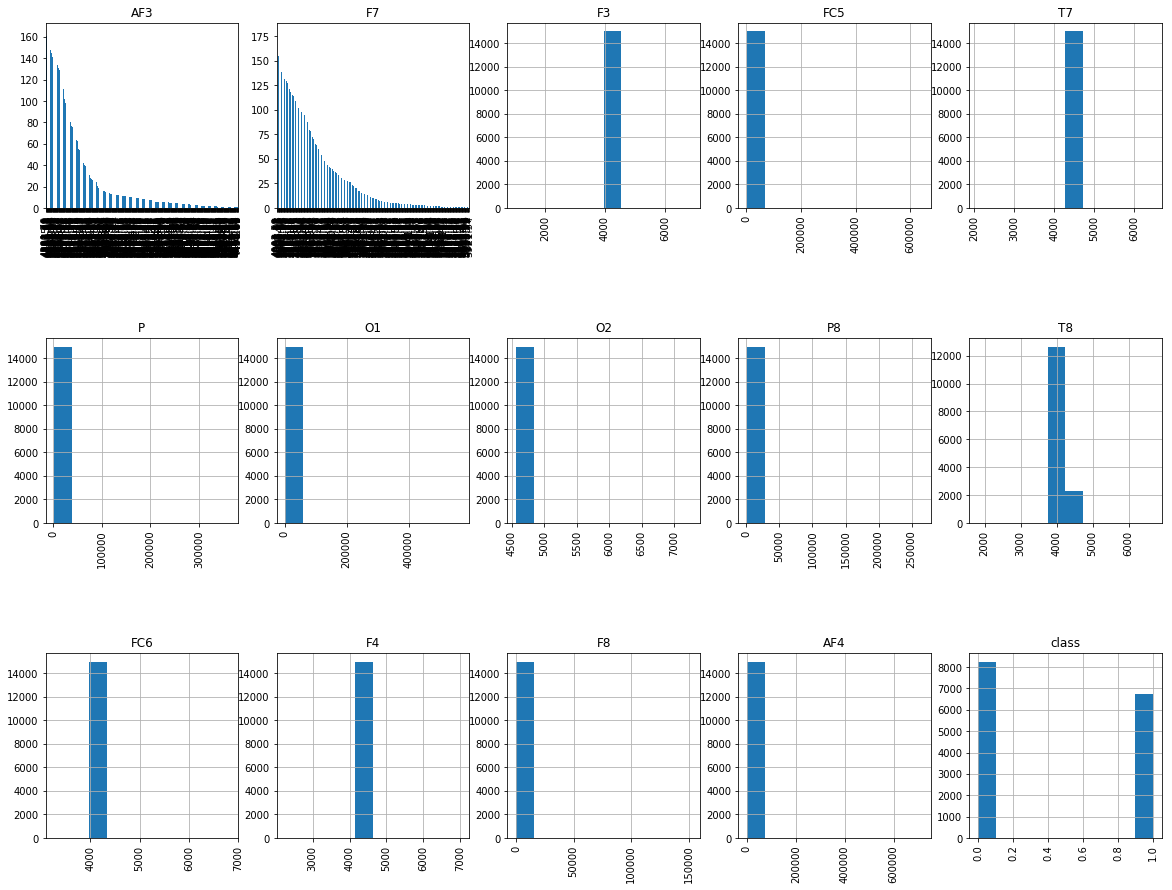

In [12]:
fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(EEG_OG_Data.shape[1]) / cols)
for i, column in enumerate(EEG_OG_Data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if EEG_OG_Data.dtypes[column] == np.object:
        EEG_OG_Data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        EEG_OG_Data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

#### Let's look at correlation between AF3 and Class


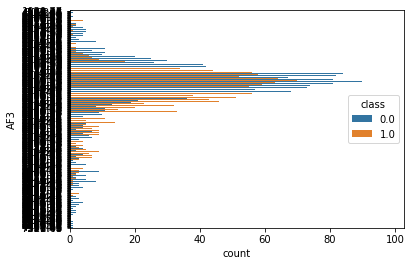

In [13]:
sns.countplot(y='AF3', hue='class', data=EEG_OG_Data,)

#### Let's look at correlation between F7 and Class


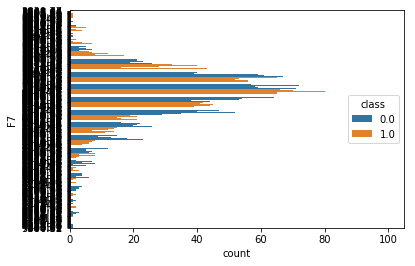

In [14]:
sns.countplot(y='F7', hue='class', data=EEG_OG_Data,)

<p> From preliminary analysis it appears that F7 is a better feature to separate class than AF3
#### Let's look at correlation across all variables


In [15]:
def plot_correlation(df, size=15):
    corr= df.corr()
    fig, ax =plt.subplots(figsize=(size,size))
    cax=ax.matshow(corr, cmap='GnBu')
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.colorbar(cax)
    plt.show()

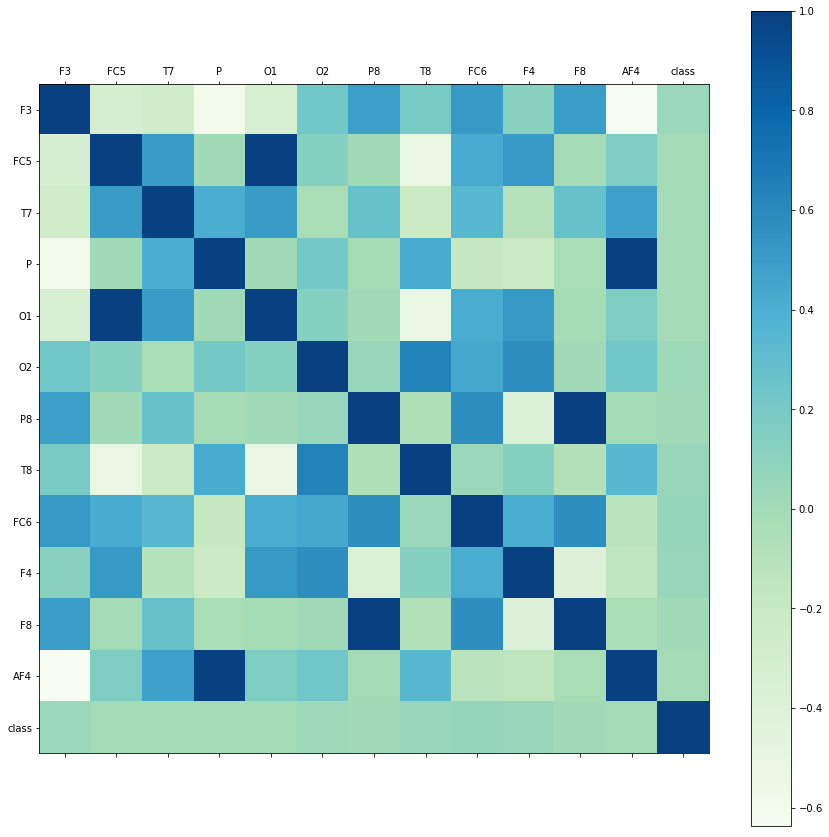

In [16]:
plot_correlation(EEG_OG_Data, size=15 )

# Let's Clean up the data


In [17]:
# Let's Clean up the data
NAN_index_list=EEG_OG_Data[EEG_OG_Data.isnull().any(axis=1)].index
len(NAN_index_list)

0

_____________________________________________________________________________________________________________
# Functions
_____________________________________________________________________________________________________________

In [18]:
#SPLIT DATA INTO TEST AND TRAINVAL
def split_Data_TV_Test(df,class_col, test_):
    X= df.drop([str(class_col)],axis=1)
    Y=df[str(class_col)]
    
    test_split_size=test_
    #Creation of Train and Test dataset
    X_TV, X_test, y_TV, y_test = train_test_split(X,Y,test_size=test_split_size,random_state=22)
    train_=round((1-test_)*100)
    print ("Train: {0}% Test: {1}%".format(train_,(test_*100)))
    print ("Train/Validation dataset: {0}  {1}".format(X_TV.shape, y_TV.shape))
    print ("Test dataset: {0}  {1}".format(X_test.shape, y_test.shape))
    return X_TV, X_test, y_TV, y_test, train_

In [19]:
#SPLIT DATA INTO TRAIN AND VAL
def split_Data_T_V_(X_tv, y_tv, val_):
    val_split_size=val_
    #Creation of Train and Test dataset
    X_Tr, X_val, y_Tr, y_val = train_test_split(X_tv,y_tv,test_size=val_split_size,random_state=22)
   
    print ("Train: {0}% Validation: {1}%".format(round((1-val_)*100),(val_*100)))
    print ("Train dataset: {0}  {1}".format(X_Tr.shape, y_Tr.shape))
    print ("Validation dataset: {0}  {1}".format(X_val.shape, y_val.shape))

    return X_Tr, X_val, y_Tr, y_val

In [20]:
def Model_Selection(X_TV, y_TV, val_):
    models = []
    names = ['LR','Random Forest','Neural Network','GaussianNB','DecisionTreeClassifier','SVM',]

    models.append((LogisticRegression()))
    models.append((RandomForestClassifier(n_estimators=100)))
    models.append((MLPClassifier()))
    models.append((GaussianNB()))
    models.append((DecisionTreeClassifier()))
    models.append((SVC()))




    X_Tr, X_val, y_Tr, y_val=split_Data_T_V_(X_TV, y_TV, val_)
    rand_ints=[35,56,82]
    for r in range(len(rand_ints)):
        kfold = model_selection.KFold(n_splits=5,random_state=rand_ints[r])
        print ('-'*40)
        print ('Random kfold selection #{0}'.format(r+1))

        for i in range(0,len(models)):    
            cv_result = model_selection.cross_val_score(models[i],X_Tr,y_Tr,cv=kfold,scoring='accuracy')
            score=models[i].fit(X_Tr,y_Tr)
            prediction = models[i].predict(X_val)
            acc_score = accuracy_score(y_val,prediction)     
        
            print ('{0}: {1}'.format(names[i],acc_score))

    duration = 1000  # millisecond
    freq = 500  # Hz
    winsound.Beep(freq, duration)

In [21]:
def Linear_SVM_GRID_Search(DATASET, df,class_col, test_):
    X_TV, X_test, y_TV, y_test, train_ =split_Data_TV_Test(df,class_col, test_)
    #3 Trials
    tuned_parameters = [{'kernel': ['linear'],'C': [10**-3,10**-1,1,10,100]},
                        {'kernel': ['linear'],'C': [10**-3,10**-1,1,10,100]},
                        {'kernel': ['linear'],'C': [10**-3,10**-1,1,10,100]}]
    #Accuracy optimized
    #Cross Validation=3
    scores = 'accuracy'
    c=0
    data_all=[]
    for parameter in tuned_parameters:
        print("# Tuning hyper-parameters for %s" % scores)
        print()

        clf = GridSearchCV(svm.SVC(), parameter, cv=3,scoring=scores)
        clf.fit(X_TV, y_TV)
        c+=1
    
    
        print("Trial # {0}".format(c))
        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        
        #write data to a CSV 
        #outputs 
        
        # DF | Train % | Test % 
        row1=[DATASET, train_, test_ ]
        #TV | Len(X_TV) | Len(y_TV)
        row2=[ "Training/Validation", "#TV Feature Samples", "#TV Class Labels"]
        row3=[ "",X_TV.shape, y_TV.shape ]

        #Test | Len(X_Test) | Len(y_Test)
        row4=[ "Test", "#Test Feature Samples", "#Test Class Labels"]
        row5=[ "",X_test.shape, y_test.shape ]
        #Trial #         #Best Parameter: 
        row6=['Trial/ Best Parameter', c, clf.best_params_]
        #Grid Scores=
        
        Grid_of_scores=[]
        row7=["Training Accuracies","_","_"]
        row8=["Mean", "Standard Deviation", "Parameter"]
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
            Grid_of_scores.append([mean, std * 2, params])
        
        data=[row1, row2, row3, row4,row5, row6, row7, row8]
        for i in data:
            data_all.append(i)
        for i in Grid_of_scores:
            data_all.append(i) 
            
        #SAVE RESULTS
    output=pd.DataFrame(data=data_all)
        
    return output

In [22]:
def Linear_SVM_TEST(DATASET,X_TV, y_TV, X_test, y_test, best_param, Accuracies_DF):
    clf =svm.SVC(kernel='linear', C=best_param)
    clf.fit(X_TV, y_TV)
    y_pred=clf.predict(X_test)
    Test_accuracy=(accuracy_score(y_test, y_pred, normalize=False))/(len(y_test))
    print (Test_accuracy)
    num=[len(Accuracies_DF)]
    df3 = pd.DataFrame({0: "Test Accuracy",
                        1: Test_accuracy , 
                        2: "_____________"}, index=[num])
    
    
    Accuracies_DF=Accuracies_DF.append(df3)
    return Accuracies_DF

In [23]:
def Decision_Tree_GRID_Search(DATASET, df,class_col, test_):
    X_TV, X_test, y_TV, y_test, train_ =split_Data_TV_Test(df,class_col, test_)
    #3 Trials
    tuned_parameters = [{'max_depth': (3, 5, 7)},
                        {'max_depth': (3, 5, 7)},
                        {'max_depth': (3, 5, 7)}]
    
    #Accuracy optimized
    #Cross Validation=3
    scores = 'accuracy'
    c=0
    data_all=[]
    for parameter in tuned_parameters:
        print("# Tuning hyper-parameters for %s" % scores)
        print()

        clf = GridSearchCV(tree.DecisionTreeClassifier(), parameter, cv=3,scoring=scores)
        clf.fit(X_TV, y_TV)
        c+=1
    
    
        print("Trial # {0}".format(c))
        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        
         #write data to a CSV 
        #outputs 
        
        # DF | Train % | Test % 
        row1=[DATASET, train_, test_ ]
        #TV | Len(X_TV) | Len(y_TV)
        row2=[ "Training/Validation", "#TV Feature Samples", "#TV Class Labels"]
        row3=[ "",X_TV.shape, y_TV.shape ]

        #Test | Len(X_Test) | Len(y_Test)
        row4=[ "Test", "#Test Feature Samples", "#Test Class Labels"]
        row5=[ "",X_test.shape, y_test.shape ]
        #Trial #         #Best Parameter: 
        row6=['Trial/ Best Parameter', c, clf.best_params_]
        #Grid Scores=
        
        Grid_of_scores=[]
        row7=["Training Accuracies","_","_"]
        row8=["Mean", "Standard Deviation", "Parameter"]
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
            Grid_of_scores.append([mean, std * 2, params])
        
        data=[row1, row2, row3, row4,row5, row6, row7, row8]
        for i in data:
            data_all.append(i)
        for i in Grid_of_scores:
            data_all.append(i) 
            
        #SAVE RESULTS
    output=pd.DataFrame(data=data_all)
        
    return output

In [26]:
def Decision_Tree_TEST(DATASET,df,train_, X_TV, y_TV, X_test, y_test, best_param, Accuracies_DF):
    
    
    labels=EEG_OG_Data.columns
    labels=labels.drop("class")
    
    clf =tree.DecisionTreeClassifier(max_depth=best_param)
    clf.fit(X_TV, y_TV) 
    
    
    dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=labels,  
                         class_names=['open','close'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = graphviz.Source(dot_data)  
    graph.render(str(DATASET)+'___'+str(train_))
    
    y_pred=clf.predict(X_test)
    Test_accuracy=(accuracy_score(y_test, y_pred, normalize=False))/(len(y_test))
    print (Test_accuracy)
    
    
    num=[len(Accuracies_DF)]
    df3 = pd.DataFrame({0: "Test Accuracy",
                        1: Test_accuracy , 
                        2: "_____________"}, index=[num])
    
    
    Accuracies_DF=Accuracies_DF.append(df3)
    return Accuracies_DF

In [27]:
def Random_Forest_GRID_Search(DATASET, df,class_col, test_):
    X_TV, X_test, y_TV, y_test, train_ =split_Data_TV_Test(df,class_col, test_)
    #3 Trials
    tuned_parameters = [{'max_depth': range(1,10,2), 'n_estimators':(10,50,100)},
                        {'max_depth': range(1,10,2), 'n_estimators':(10,50,100)},
                        {'max_depth': range(1,10,2), 'n_estimators':(10,50,100)}]
    
    #Accuracy optimized
    #Cross Validation=3
    scores = 'accuracy'
    c=0
    data_all=[]
    for parameter in tuned_parameters:
        print("# Tuning hyper-parameters for %s" % scores)
        print()

        clf = GridSearchCV(RandomForestClassifier(), parameter, cv=3,scoring=scores)
        clf.fit(X_TV, y_TV)
        c+=1
    
    
        print("Trial # {0}".format(c))
        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        
         #write data to a CSV 
        #outputs 
        
        # DF | Train % | Test % 
        row1=[DATASET, train_, test_ ]
        #TV | Len(X_TV) | Len(y_TV)
        row2=[ "Training/Validation", "#TV Feature Samples", "#TV Class Labels"]
        row3=[ "",X_TV.shape, y_TV.shape ]

        #Test | Len(X_Test) | Len(y_Test)
        row4=[ "Test", "#Test Feature Samples", "#Test Class Labels"]
        row5=[ "",X_test.shape, y_test.shape ]
        #Trial #         #Best Parameter: 
        row6=['Trial/ Best Parameter', c, clf.best_params_]
        #Grid Scores=
        
        Grid_of_scores=[]
        row7=["Training Accuracies","_","_"]
        row8=["Mean", "Standard Deviation", "Parameter"]
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
            Grid_of_scores.append([mean, std * 2, params])
        
        data=[row1, row2, row3, row4,row5, row6, row7, row8]
        for i in data:
            data_all.append(i)
        for i in Grid_of_scores:
            data_all.append(i) 
            
        #SAVE RESULTS
    output=pd.DataFrame(data=data_all)
        
    return output

In [28]:
def Random_Forest_TEST(DATASET,X_TV, y_TV, X_test, y_test, Best_depth, Best_n, Accuracies_DF):
    clf =RandomForestClassifier(max_depth=Best_depth, n_estimators=Best_n)
    clf.fit(X_TV, y_TV)
    y_pred=clf.predict(X_test)
    Test_accuracy=(accuracy_score(y_test, y_pred, normalize=False))/(len(y_test))
    print (Test_accuracy)
    num=[len(Accuracies_DF)]
    df3 = pd.DataFrame({0: "Test Accuracy",
                        1: Test_accuracy , 
                        2: "_____________"}, index=[num])
    
    
    Accuracies_DF=Accuracies_DF.append(df3)
    return Accuracies_DF



### Splits include 
    - 20% TV, 80% Test
    - 50% TV, 50% Test
    - 80% TV, 20% Test
    
# Split 1 : 20% Train, 80% Test    

In [29]:
X_TV, X_test, y_TV, y_test, train_ =split_Data_TV_Test(EEG_OG_Data, "class" , .8)

Train: 20% Test: 80.0%
Train/Validation dataset: (2996, 14)  (2996,)
Test dataset: (11984, 14)  (11984,)


#### Model Selection 

Lets see how different classifiers perform on set

k-fold implementation (k=3)

In [30]:
#val_=.25 
Model_Selection(X_TV, y_TV, .25)

Train: 75% Validation: 25.0%
Train dataset: (2247, 14)  (2247,)
Validation dataset: (749, 14)  (749,)
----------------------------------------
Random kfold selection #1
LR: 0.6381842456608812
Random Forest: 0.8598130841121495
Neural Network: 0.5554072096128171
GaussianNB: 0.4539385847797063
DecisionTreeClassifier: 0.7476635514018691
SVM: 0.5554072096128171
----------------------------------------
Random kfold selection #2
LR: 0.6381842456608812
Random Forest: 0.8651535380507344
Neural Network: 0.4459279038718291
GaussianNB: 0.4539385847797063
DecisionTreeClassifier: 0.7356475300400535
SVM: 0.5554072096128171
----------------------------------------
Random kfold selection #3
LR: 0.6381842456608812
Random Forest: 0.8451268357810414
Neural Network: 0.4459279038718291
GaussianNB: 0.4539385847797063
DecisionTreeClassifier: 0.7543391188251002
SVM: 0.5554072096128171


  #### Linear SVM
  
  <p> Implementation using sklearn svm.SVC(Kernel='Linear') </p>

In [31]:
SP1_SVM_Accuracies_DF=Linear_SVM_GRID_Search(DATASET, EEG_OG_Data,"class", .8)

Train: 20% Test: 80.0%
Train/Validation dataset: (2996, 14)  (2996,)
Test dataset: (11984, 14)  (11984,)
# Tuning hyper-parameters for accuracy

Trial # 1
Best parameters set found on development set:

{'C': 0.001, 'kernel': 'linear'}

Grid scores on development set:

0.650 (+/-0.016) for {'C': 0.001, 'kernel': 'linear'}
0.632 (+/-0.020) for {'C': 0.1, 'kernel': 'linear'}
0.628 (+/-0.012) for {'C': 1, 'kernel': 'linear'}
0.634 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.625 (+/-0.032) for {'C': 100, 'kernel': 'linear'}
# Tuning hyper-parameters for accuracy

Trial # 2
Best parameters set found on development set:

{'C': 0.001, 'kernel': 'linear'}

Grid scores on development set:

0.650 (+/-0.016) for {'C': 0.001, 'kernel': 'linear'}
0.632 (+/-0.020) for {'C': 0.1, 'kernel': 'linear'}
0.628 (+/-0.012) for {'C': 1, 'kernel': 'linear'}
0.634 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.625 (+/-0.032) for {'C': 100, 'kernel': 'linear'}
# Tuning hyper-parameters for accuracy

Trial # 3

In [32]:
SP1_SVM_Accuracies_DF=Linear_SVM_TEST(DATASET,X_TV, y_TV, X_test, y_test, 0.001 , SP1_SVM_Accuracies_DF)

0.6528704939919893


#### Decision Tree

In [33]:
SP1_Decision_Tree_Accuracies_DF=Decision_Tree_GRID_Search(DATASET, EEG_OG_Data,"class", .8)

Train: 20% Test: 80.0%
Train/Validation dataset: (2996, 14)  (2996,)
Test dataset: (11984, 14)  (11984,)
# Tuning hyper-parameters for accuracy

Trial # 1
Best parameters set found on development set:

{'max_depth': 7}

Grid scores on development set:

0.653 (+/-0.026) for {'max_depth': 3}
0.690 (+/-0.050) for {'max_depth': 5}
0.726 (+/-0.051) for {'max_depth': 7}
# Tuning hyper-parameters for accuracy

Trial # 2
Best parameters set found on development set:

{'max_depth': 7}

Grid scores on development set:

0.653 (+/-0.026) for {'max_depth': 3}
0.691 (+/-0.053) for {'max_depth': 5}
0.725 (+/-0.055) for {'max_depth': 7}
# Tuning hyper-parameters for accuracy

Trial # 3
Best parameters set found on development set:

{'max_depth': 7}

Grid scores on development set:

0.653 (+/-0.026) for {'max_depth': 3}
0.690 (+/-0.050) for {'max_depth': 5}
0.725 (+/-0.057) for {'max_depth': 7}


In [34]:
SP1_Decision_Tree_Accuracies_DF=Decision_Tree_TEST(DATASET,EEG_OG_Data, train_, X_TV, y_TV, X_test, y_test, 7 , SP1_Decision_Tree_Accuracies_DF)

0.7402369826435247


#### Random Forest

In [35]:
SP1_Random_Forest_Accuracies_DF=Random_Forest_GRID_Search(DATASET, EEG_OG_Data,"class", .8)

Train: 20% Test: 80.0%
Train/Validation dataset: (2996, 14)  (2996,)
Test dataset: (11984, 14)  (11984,)
# Tuning hyper-parameters for accuracy

Trial # 1
Best parameters set found on development set:

{'max_depth': 9, 'n_estimators': 100}

Grid scores on development set:

0.602 (+/-0.016) for {'max_depth': 1, 'n_estimators': 10}
0.599 (+/-0.023) for {'max_depth': 1, 'n_estimators': 50}
0.602 (+/-0.017) for {'max_depth': 1, 'n_estimators': 100}
0.690 (+/-0.022) for {'max_depth': 3, 'n_estimators': 10}
0.698 (+/-0.066) for {'max_depth': 3, 'n_estimators': 50}
0.702 (+/-0.046) for {'max_depth': 3, 'n_estimators': 100}
0.727 (+/-0.033) for {'max_depth': 5, 'n_estimators': 10}
0.753 (+/-0.025) for {'max_depth': 5, 'n_estimators': 50}
0.756 (+/-0.027) for {'max_depth': 5, 'n_estimators': 100}
0.774 (+/-0.032) for {'max_depth': 7, 'n_estimators': 10}
0.784 (+/-0.020) for {'max_depth': 7, 'n_estimators': 50}
0.785 (+/-0.018) for {'max_depth': 7, 'n_estimators': 100}
0.801 (+/-0.031) for {'max

In [36]:
SP1_Random_Forest_Accuracies_DF=Random_Forest_TEST(DATASET,X_TV, y_TV, X_test, y_test, 9, 100 , SP1_Random_Forest_Accuracies_DF)

0.8153371161548731


# Split 2 : 50% Train, 50% Test    

In [37]:
X_TV, X_test, y_TV, y_test, train_ =split_Data_TV_Test(EEG_OG_Data, "class" , .5)

Train: 50% Test: 50.0%
Train/Validation dataset: (7490, 14)  (7490,)
Test dataset: (7490, 14)  (7490,)


#### Model Selection 

Lets see how different classifiers perform on set

k-fold implementation (k=3)

In [38]:
#val_=.25 
Model_Selection(X_TV, y_TV, .25)

Train: 75% Validation: 25.0%
Train dataset: (5617, 14)  (5617,)
Validation dataset: (1873, 14)  (1873,)
----------------------------------------
Random kfold selection #1
LR: 0.6396155899626268
Random Forest: 0.9006940736785904
Neural Network: 0.5509877202349173
GaussianNB: 0.603310197544047
DecisionTreeClassifier: 0.796049119060331
SVM: 0.5589962626801922
----------------------------------------
Random kfold selection #2
LR: 0.6396155899626268
Random Forest: 0.8969567538707955
Neural Network: 0.4452749599572878
GaussianNB: 0.603310197544047
DecisionTreeClassifier: 0.792845702082221
SVM: 0.5589962626801922
----------------------------------------
Random kfold selection #3
LR: 0.6396155899626268
Random Forest: 0.8985584623598505
Neural Network: 0.44313934863854776
GaussianNB: 0.603310197544047
DecisionTreeClassifier: 0.798184730379071
SVM: 0.5589962626801922


  #### Linear SVM
  
  <p> Implementation using sklearn svm.SVC(Kernel='Linear') </p>

In [39]:
SP2_SVM_Accuracies_DF=Linear_SVM_GRID_Search(DATASET, EEG_OG_Data,"class", .5)

Train: 50% Test: 50.0%
Train/Validation dataset: (7490, 14)  (7490,)
Test dataset: (7490, 14)  (7490,)
# Tuning hyper-parameters for accuracy

Trial # 1
Best parameters set found on development set:

{'C': 0.001, 'kernel': 'linear'}

Grid scores on development set:

0.658 (+/-0.003) for {'C': 0.001, 'kernel': 'linear'}
0.645 (+/-0.009) for {'C': 0.1, 'kernel': 'linear'}
0.647 (+/-0.011) for {'C': 1, 'kernel': 'linear'}
0.645 (+/-0.011) for {'C': 10, 'kernel': 'linear'}
0.643 (+/-0.007) for {'C': 100, 'kernel': 'linear'}
# Tuning hyper-parameters for accuracy

Trial # 2
Best parameters set found on development set:

{'C': 0.001, 'kernel': 'linear'}

Grid scores on development set:

0.658 (+/-0.003) for {'C': 0.001, 'kernel': 'linear'}
0.645 (+/-0.009) for {'C': 0.1, 'kernel': 'linear'}
0.647 (+/-0.011) for {'C': 1, 'kernel': 'linear'}
0.645 (+/-0.011) for {'C': 10, 'kernel': 'linear'}
0.643 (+/-0.007) for {'C': 100, 'kernel': 'linear'}
# Tuning hyper-parameters for accuracy

Trial # 3
B

In [40]:
SP2_SVM_Accuracies_DF=Linear_SVM_TEST(DATASET,X_TV, y_TV, X_test, y_test, 0.001 , SP2_SVM_Accuracies_DF)

0.6579439252336449


#### Decision Tree

In [41]:
SP2_Decision_Tree_Accuracies_DF=Decision_Tree_GRID_Search(DATASET, EEG_OG_Data,"class", .5)

Train: 50% Test: 50.0%
Train/Validation dataset: (7490, 14)  (7490,)
Test dataset: (7490, 14)  (7490,)
# Tuning hyper-parameters for accuracy

Trial # 1
Best parameters set found on development set:

{'max_depth': 7}

Grid scores on development set:

0.674 (+/-0.021) for {'max_depth': 3}
0.709 (+/-0.011) for {'max_depth': 5}
0.746 (+/-0.008) for {'max_depth': 7}
# Tuning hyper-parameters for accuracy

Trial # 2
Best parameters set found on development set:

{'max_depth': 7}

Grid scores on development set:

0.674 (+/-0.021) for {'max_depth': 3}
0.709 (+/-0.010) for {'max_depth': 5}
0.745 (+/-0.011) for {'max_depth': 7}
# Tuning hyper-parameters for accuracy

Trial # 3
Best parameters set found on development set:

{'max_depth': 7}

Grid scores on development set:

0.674 (+/-0.021) for {'max_depth': 3}
0.709 (+/-0.011) for {'max_depth': 5}
0.746 (+/-0.010) for {'max_depth': 7}


In [42]:
SP2_Decision_Tree_Accuracies_DF=Decision_Tree_TEST(DATASET,EEG_OG_Data, train_, X_TV, y_TV, X_test, y_test, 7 , SP2_Decision_Tree_Accuracies_DF)

0.7380507343124165


#### Random Forest

In [46]:
SP2_Random_Forest_Accuracies_DF=Random_Forest_GRID_Search(DATASET, EEG_OG_Data,"class", .5)

Train: 50% Test: 50.0%
Train/Validation dataset: (7490, 14)  (7490,)
Test dataset: (7490, 14)  (7490,)
# Tuning hyper-parameters for accuracy

Trial # 1
Best parameters set found on development set:

{'max_depth': 9, 'n_estimators': 100}

Grid scores on development set:

0.591 (+/-0.027) for {'max_depth': 1, 'n_estimators': 10}
0.595 (+/-0.015) for {'max_depth': 1, 'n_estimators': 50}
0.597 (+/-0.020) for {'max_depth': 1, 'n_estimators': 100}
0.700 (+/-0.034) for {'max_depth': 3, 'n_estimators': 10}
0.709 (+/-0.020) for {'max_depth': 3, 'n_estimators': 50}
0.718 (+/-0.033) for {'max_depth': 3, 'n_estimators': 100}
0.743 (+/-0.008) for {'max_depth': 5, 'n_estimators': 10}
0.754 (+/-0.013) for {'max_depth': 5, 'n_estimators': 50}
0.760 (+/-0.014) for {'max_depth': 5, 'n_estimators': 100}
0.780 (+/-0.015) for {'max_depth': 7, 'n_estimators': 10}
0.802 (+/-0.007) for {'max_depth': 7, 'n_estimators': 50}
0.798 (+/-0.006) for {'max_depth': 7, 'n_estimators': 100}
0.813 (+/-0.018) for {'max_d

In [47]:
SP2_Random_Forest_Accuracies_DF=Random_Forest_TEST(DATASET,X_TV, y_TV, X_test, y_test, 9, 100 , SP2_Random_Forest_Accuracies_DF)

0.8407209612817089


# Split 3 : 80% Train, 20% Test    

In [48]:
X_TV, X_test, y_TV, y_test, train_ =split_Data_TV_Test(EEG_OG_Data, "class" , .2)

Train: 80% Test: 20.0%
Train/Validation dataset: (11984, 14)  (11984,)
Test dataset: (2996, 14)  (2996,)


#### Model Selection 

Lets see how different classifiers perform on set

k-fold implementation (k=3)

In [49]:
#val_=.25 
Model_Selection(X_TV, y_TV, .25)

Train: 75% Validation: 25.0%
Train dataset: (8988, 14)  (8988,)
Validation dataset: (2996, 14)  (2996,)
----------------------------------------
Random kfold selection #1
LR: 0.6672229639519359
Random Forest: 0.9218958611481975
Neural Network: 0.5497329773030708
GaussianNB: 0.44893190921228304
DecisionTreeClassifier: 0.8157543391188251
SVM: 0.5497329773030708
----------------------------------------
Random kfold selection #2
LR: 0.6672229639519359
Random Forest: 0.921562082777036
Neural Network: 0.4506008010680908
GaussianNB: 0.44893190921228304
DecisionTreeClassifier: 0.8140854472630173
SVM: 0.5497329773030708
----------------------------------------
Random kfold selection #3
LR: 0.6672229639519359
Random Forest: 0.9279038718291055
Neural Network: 0.5493991989319092
GaussianNB: 0.44893190921228304
DecisionTreeClassifier: 0.8167556742323098
SVM: 0.5497329773030708


  #### Linear SVM
  
  <p> Implementation using sklearn svm.SVC(Kernel='Linear') </p>

In [50]:
SP3_SVM_Accuracies_DF=Linear_SVM_GRID_Search(DATASET, EEG_OG_Data,"class", .2)

Train: 80% Test: 20.0%
Train/Validation dataset: (11984, 14)  (11984,)
Test dataset: (2996, 14)  (2996,)
# Tuning hyper-parameters for accuracy

Trial # 1
Best parameters set found on development set:

{'C': 0.001, 'kernel': 'linear'}

Grid scores on development set:

0.658 (+/-0.008) for {'C': 0.001, 'kernel': 'linear'}
0.643 (+/-0.011) for {'C': 0.1, 'kernel': 'linear'}
0.646 (+/-0.015) for {'C': 1, 'kernel': 'linear'}
0.648 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.644 (+/-0.013) for {'C': 100, 'kernel': 'linear'}
# Tuning hyper-parameters for accuracy

Trial # 2
Best parameters set found on development set:

{'C': 0.001, 'kernel': 'linear'}

Grid scores on development set:

0.658 (+/-0.008) for {'C': 0.001, 'kernel': 'linear'}
0.643 (+/-0.011) for {'C': 0.1, 'kernel': 'linear'}
0.646 (+/-0.015) for {'C': 1, 'kernel': 'linear'}
0.648 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.644 (+/-0.013) for {'C': 100, 'kernel': 'linear'}
# Tuning hyper-parameters for accuracy

Trial # 3

In [51]:
SP3_SVM_Accuracies_DF=Linear_SVM_TEST(DATASET,X_TV, y_TV, X_test, y_test, 0.001 , SP3_SVM_Accuracies_DF)

0.6565420560747663


#### Decision Tree

In [55]:
SP3_Decision_Tree_Accuracies_DF=Decision_Tree_GRID_Search(DATASET, EEG_OG_Data,"class", .2)

Train: 80% Test: 20.0%
Train/Validation dataset: (11984, 14)  (11984,)
Test dataset: (2996, 14)  (2996,)
# Tuning hyper-parameters for accuracy

Trial # 1
Best parameters set found on development set:

{'max_depth': 7}

Grid scores on development set:

0.661 (+/-0.013) for {'max_depth': 3}
0.711 (+/-0.008) for {'max_depth': 5}
0.757 (+/-0.024) for {'max_depth': 7}
# Tuning hyper-parameters for accuracy

Trial # 2
Best parameters set found on development set:

{'max_depth': 7}

Grid scores on development set:

0.661 (+/-0.013) for {'max_depth': 3}
0.711 (+/-0.008) for {'max_depth': 5}
0.757 (+/-0.023) for {'max_depth': 7}
# Tuning hyper-parameters for accuracy

Trial # 3
Best parameters set found on development set:

{'max_depth': 7}

Grid scores on development set:

0.661 (+/-0.013) for {'max_depth': 3}
0.711 (+/-0.008) for {'max_depth': 5}
0.757 (+/-0.022) for {'max_depth': 7}


In [56]:
SP3_Decision_Tree_Accuracies_DF=Decision_Tree_TEST(DATASET,EEG_OG_Data, train_, X_TV, y_TV, X_test, y_test, 7 , SP3_Decision_Tree_Accuracies_DF)

0.7680240320427236


#### Random Forest

In [57]:
SP3_Random_Forest_Accuracies_DF=Random_Forest_GRID_Search(DATASET, EEG_OG_Data,"class", .2)

Train: 80% Test: 20.0%
Train/Validation dataset: (11984, 14)  (11984,)
Test dataset: (2996, 14)  (2996,)
# Tuning hyper-parameters for accuracy

Trial # 1
Best parameters set found on development set:

{'max_depth': 9, 'n_estimators': 100}

Grid scores on development set:

0.598 (+/-0.006) for {'max_depth': 1, 'n_estimators': 10}
0.600 (+/-0.013) for {'max_depth': 1, 'n_estimators': 50}
0.604 (+/-0.004) for {'max_depth': 1, 'n_estimators': 100}
0.696 (+/-0.019) for {'max_depth': 3, 'n_estimators': 10}
0.704 (+/-0.006) for {'max_depth': 3, 'n_estimators': 50}
0.707 (+/-0.004) for {'max_depth': 3, 'n_estimators': 100}
0.753 (+/-0.011) for {'max_depth': 5, 'n_estimators': 10}
0.760 (+/-0.005) for {'max_depth': 5, 'n_estimators': 50}
0.762 (+/-0.010) for {'max_depth': 5, 'n_estimators': 100}
0.790 (+/-0.007) for {'max_depth': 7, 'n_estimators': 10}
0.805 (+/-0.006) for {'max_depth': 7, 'n_estimators': 50}
0.808 (+/-0.012) for {'max_depth': 7, 'n_estimators': 100}
0.824 (+/-0.003) for {'max

In [58]:
SP3_Random_Forest_Accuracies_DF=Random_Forest_TEST(DATASET,X_TV, y_TV, X_test, y_test, 9, 100 , SP3_Random_Forest_Accuracies_DF)

0.8427903871829105


# Export Results 

In [59]:
list_of_Data_Results=[SP1_SVM_Accuracies_DF,SP1_Decision_Tree_Accuracies_DF,SP1_Random_Forest_Accuracies_DF,
                      SP2_SVM_Accuracies_DF,SP2_Decision_Tree_Accuracies_DF,SP2_Random_Forest_Accuracies_DF,
                      SP3_SVM_Accuracies_DF,SP3_Decision_Tree_Accuracies_DF,SP3_Random_Forest_Accuracies_DF]

RESULTS = pd.concat(list_of_Data_Results, axis=0, ignore_index=True)



In [60]:
RESULTS.to_csv((str(DATASET)+'_results.csv'))